In [1]:
from model import PModel

import numpy as np
from matplotlib import pyplot as plt

#Global parameters
p1 = 0.3        #Probability of first-order epistatic interaction
p2 = 0.3        #Probability of second-order epistatic interaction
sigma1 = 0.3    #Standard deviation for first-order epistasis
sigma2 = 0.3    #Standard deviation for second-order epistasis
mu1 = 1.3       #Average epistatic effect for synergistic epistasis
mu2 = 0.7       #Average epistatic effect for antagonistic epistasis

In [2]:
#Compute the average Pareto front from a sequence of random genotype distributions
def sim_array(n_loci, n_sims, n_steps=100, epi=0, beta=1, mu=1):
	sim = PModel(n_loci, np.zeros(n_loci), np.zeros(n_loci), beta=beta)

	coefs = np.zeros(n_sims)
	cost_grid = np.zeros((n_sims, n_steps))
	res_vals = np.linspace(0, 1, n_steps)

	for i in range(n_sims):
		cost = np.random.exponential(0.1, n_loci)
		res = np.random.exponential(0.1, n_loci)
		sim.update_loci(res, cost)

		if epi == 1:
			sim.add_epistasis(2, p1, sigma1, mu)
		elif epi ==	2:
			sim.add_epistasis(2, p1, sigma1, mu)
			sim.add_epistasis(3, p2, sigma2, mu)

		sim.normalize()

		res, fec = sim.pareto()
		fec_interp = np.interp(res_vals, res, fec)

		coefs[i] = np.polyfit(1 - res, 1 - fec, 2)[0]
		cost_grid[i,:] = fec_interp

	cost_avg = np.average(cost_grid, axis=0)
	cost_std = np.std(cost_grid, axis=0)

	return cost_avg, cost_std, coefs

Curvature values:
means: 0.8185419988122327 0.1989685135434486
stdevs: 0.3787394485718614 0.36594106860910003
Curvature values:
means: 1.140747329654168 0.8141297521817035 10.273240561960584
stdevs: 0.36929793261832056 0.45544063464875895 19.23365581540332


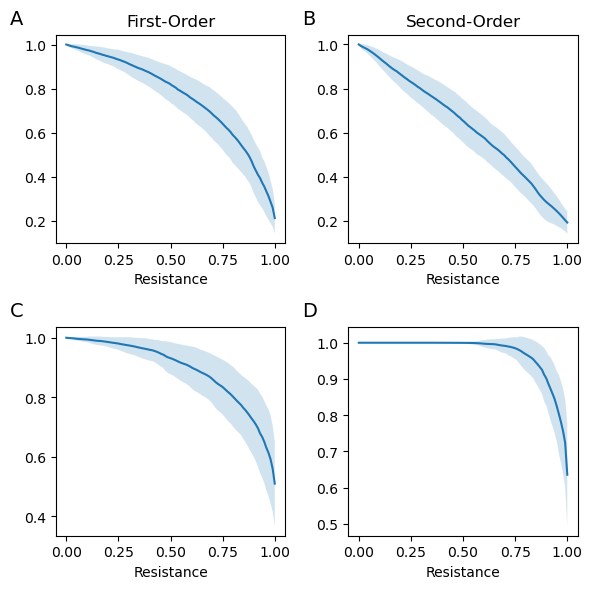

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6,6))

n_loci = 9
costs_epi_1, err_epi_1, coefs_1 = sim_array(n_loci, 100, epi=1, mu = mu1)
costs_epi_2, err_epi_2, coefs_2 = sim_array(n_loci, 100, epi=2, mu = mu1)

print('Curvature values:')

print('means:', np.mean(coefs_1), np.mean(coefs_2))
print('stdevs:', np.std(coefs_1), np.std(coefs_2))

res_pts = np.linspace(0, 1, 100)

ax[0,0].set_title('First-Order')
ax[0,1].set_title('Second-Order')

ax[0,0].plot(1 - res_pts, costs_epi_1)
ax[0,0].fill_between(1 - res_pts, costs_epi_1-err_epi_1, costs_epi_1+err_epi_1, alpha=0.2)
ax[0,0].set_xlabel('Resistance')

ax[0,1].plot(1 - res_pts, costs_epi_2)
ax[0,1].fill_between(1 - res_pts, costs_epi_2-err_epi_2, costs_epi_2+err_epi_2, alpha=0.2)
ax[0,1].set_xlabel('Resistance')

n_loci = 9
costs, err, coefs_0 = sim_array(n_loci, 100, mu = mu2)
costs_epi_1, err_epi_1, coefs_1 = sim_array(n_loci, 100, epi=1, mu = mu2)
costs_epi_2, err_epi_2, coefs_2 = sim_array(n_loci, 100, epi=2, mu = mu2)

print('Curvature values:')

print('means:', np.mean(coefs_0), np.mean(coefs_1), np.mean(coefs_2))
print('stdevs:', np.std(coefs_0), np.std(coefs_1), np.std(coefs_2))

ax[1,0].plot(1 - res_pts, costs_epi_1)
ax[1,0].fill_between(1 - res_pts, costs_epi_1-err_epi_1, costs_epi_1+err_epi_1, alpha=0.2)
ax[1,0].set_xlabel('Resistance')

ax[1,1].plot(1 - res_pts, costs_epi_2)
ax[1,1].fill_between(1 - res_pts, costs_epi_2-err_epi_2, costs_epi_2+err_epi_2, alpha=0.2)
ax[1,1].set_xlabel('Resistance')

ax[0,0].annotate("A", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[0,1].annotate("B", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[1,0].annotate("C", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[1,1].annotate("D", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)

plt.tight_layout()